<a href="https://colab.research.google.com/github/amandeep0/gec/blob/master/location_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycountry

     |████████████████████████████████| 10.1MB 5.2MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746865 sha256=44db65837fabd19d567010cbf469bea36455bcb61f88b8ca5c39e39f0a7812cd
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [5]:
import pycountry
text = "United States (New York), United Kingdom (London)".lower()
for country in pycountry.countries:
    if country.name.lower() in text:
        print(country.name)


United Kingdom
United States


In [10]:
!pip install geograpy3

     |████████████████████████████████| 1.3MB 4.3MB/s 
     |████████████████████████████████| 215kB 26.4MB/s 
     |████████████████████████████████| 102kB 10.2MB/s 
     |████████████████████████████████| 194kB 25.6MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 7.4MB 18.9MB/s 
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3355 sha256=7a00946a7c770a4d39ae4f4b69368c06068c6133e59894008bd8235a9efe6a48
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for feedparser: filename=feedparser-5.2.1-cp36-none-any.whl size=44939 sha256=40379f46d0216e5b9b22cca8137af57534af62b1dd291a82d528fb3c7fdc19a4
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7398406 sha256=1378d213a17f9367da1030ce8bef1cbc577ab46027d

In [37]:
import geograpy
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
url = 'http://www.bbc.com/news/world-europe-26919928'
places = geograpy.get_place_context(text="I was born in Russia. I then moved to California.")
print(places.places)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
['Russia', 'California']


[]


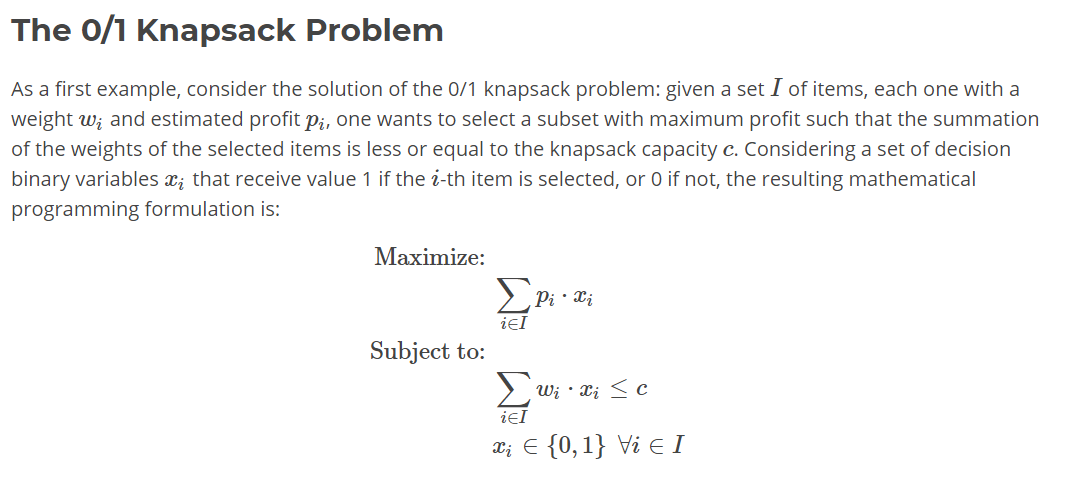

In [22]:
!pip install mip
from mip import Model, xsum, maximize, BINARY

p = [10, 13, 18, 31, 7, 15]
w = [11, 15, 20, 35, 10, 33]
c, I = 47, range(len(w))

m = Model("knapsack")

x = [m.add_var(var_type=BINARY) for i in I]

m.objective = maximize(xsum(p[i] * x[i] for i in I))

m += xsum(w[i] * x[i] for i in I) <= c

m.optimize()

selected = [i for i in I if x[i].x >= 0.99]
print("selected items: {}".format(selected))


selected items: [0, 3]


## Greedy Algorithm Travelling Salesman

1.   Starts at an arbitrary city
2.  Go to the next closest unvisited city
1.   Repeat (2) until all cities have been visited, save path length
2.   Start again at (1) with a diferent initial city.
1.   Repeat (1-4) until all possibilities have been exausted and return the shortest path


In [ ]:
import numpy as np

def algorithm(cities):
	best_order = []
	best_length = float('inf')

	for i_start, start in enumerate(cities):
		order = [i_start]
		length = 0

		i_next, next, dist = get_closest(start, cities, order)
		length += dist
		order.append(i_next)

		while len(order) < cities.shape[0]:
			i_next, next, dist = get_closest(next, cities, order)
			length += dist
			order.append(i_next)

		#print(order)

		if length < best_length:
			best_length = length
			best_order = order
			
	return best_order, best_length



def get_closest(city, cities, visited):
	best_distance = float('inf')

	for i, c in enumerate(cities):

		if i not in visited:
			distance = dist_squared(city, c)

			if distance < best_distance:
				closest_city = c
				i_closest_city = i
				best_distance = distance

	return i_closest_city, closest_city, best_distance

def dist_squared(c1, c2):
	t1 = c2[0] - c1[0]
	t2 = c2[1] - c1[1]

	return t1**2 + t2**2